In [92]:
import logging
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
from src.log_config import configure_logging

configure_logging(
    stream_level=logging.DEBUG,
    ignore_libs=[
        "numexpr",
        "numba",
        "bokeh",
        "matplotlib",
        "tornado",
    ],
)

In [93]:
import matplotlib.pyplot as plt
import numpy as np

from src.experiments.measurement.stimulus_generator import (
    StimulusGenerator,
)
from src.visualization.plot_stimulus import plot_all_seeds, plot_stimulus_extra

In [94]:
dummy_config = {
    "seeds": [1, 2, 3],
    "half_cycle_num": 2,
    "period_range": [2, 2],
    "big_decreasing_half_cycle_num": 0,
    "shorten_expected_duration": 0,
    "amplitude_range": [0.9, 1.0],
    "plateau_num": 0,
    "prolonged_minima_num": 0,
}

dummy_participant = {
    "temperature_baseline": 40,
    "temperature_range": 2,  # VAS 0 - VAS 70
}

config = {
    "seeds": [806, 536, 658, 536, 681, 467, 265, 743, 952, 264, 243, 265],
    "sample_rate": 10,
    "half_cycle_num": 10,
    "period_range": [5, 20],
    "amplitude_range": [0.3, 1.0],
    "inflection_point_range": [-0.4, 0.3],
    "shorten_expected_duration": 2,
    "big_decreasing_half_cycle_num": 3,
    "big_decreasing_half_cycle_period": 20,
    "big_decreasing_half_cycle_amplitude": 0.925,
    "big_decreasing_half_cycle_min_y_intercept": 0.9,
    "plateau_num": 2,
    "plateau_duration": 15,
    "plateau_percentile_range": [25, 50],
    "prolonged_minima_num": 1,
    "prolonged_minima_duration": 5,
}
config.update(dummy_participant)
seed = np.random.randint(0, 1000)
stimulus = StimulusGenerator(
    config,
    debug=0,
)

print(f"{stimulus.seed = }")
_ = plot_stimulus_extra(stimulus, s_RoC=0.2, display_stats=False)

stimulus.seed = 884


We want 12 seeds for unpredictable stimuli (note peak-and-end-rule)
- some with plateau in last peak
- some with low end temperature
- no mere sinosiodal patterns

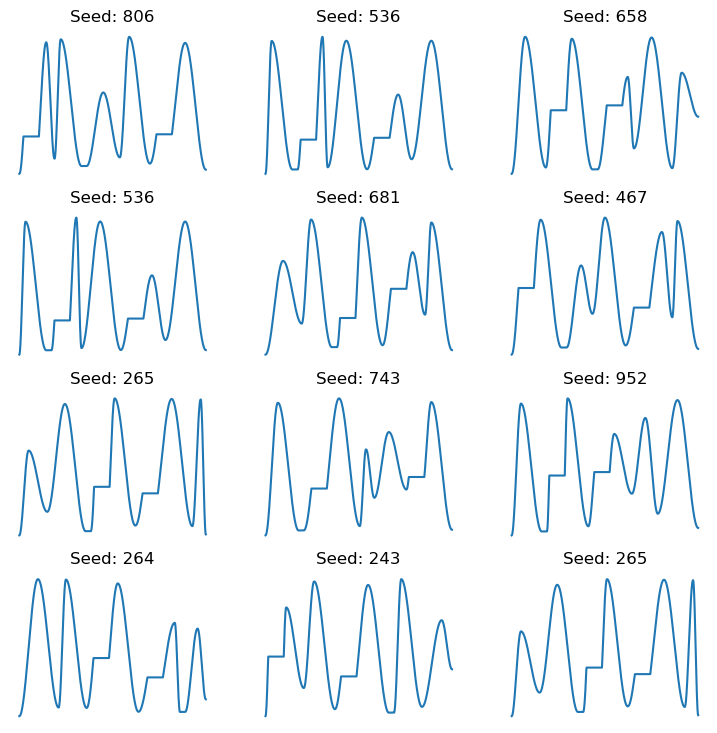

In [96]:
plot_all_seeds(config)